<a href="https://colab.research.google.com/github/ebailey345/IS_4487_Tokyo/blob/main/Copy_of_day3_lab_retailer_intro_Ella_Bailey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [3]:
# your code goes here
import pandas as pd
import matplotlib as mpl
import sklearn as sl


# Load Data

In [4]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [ ]:
# Your code goes here

In [5]:
ss.shape

(56045, 10)

In [6]:
ss.head(10)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
5,51319,2021-07-09,2021-07,Troy Rodriguez,South Brendamouth,OHIO,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
6,51357,2021-07-11,2021-07,Natalie Phillips,Rachelburgh,ALABAMA,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
7,51371,2021-07-12,2021-07,Dalton Mitchell,Michaeltown,VIRGINIA,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
8,51424,2021-07-15,2021-07,Timothy James,West Pamela,NEW YORK,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
9,51452,2021-07-17,2021-07,Fernando Scott,East Maureenbury,SOUTH DAKOTA,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [10]:
ss.describe(include='all')

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
count,56045.000000,56013,56013,56045,55571,55571,56006.000000,56045,56045,56045.000000
unique,NaN,947,35,17343,11920,54,NaN,131,9,NaN
top,NaN,2022-03-01,2022-05,Fernando Barnes,Salt Lake City,ARIZONA,NaN,Water Bottle - 30 oz.,Accessories,NaN
freq,NaN,306,5416,64,198,1353,NaN,3983,19920,NaN
mean,61668.066340,NaN,NaN,NaN,NaN,NaN,3.348498,NaN,NaN,6195.540505
std,7508.229651,NaN,NaN,NaN,NaN,NaN,422.646565,NaN,NaN,35784.727716
min,45079.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.290000
25%,55644.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,7.950000
50%,61869.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,475.600000
75%,68097.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,914.620000


In [11]:
ss.isnull().sum()

order_id              0
order_date           32
order_year_month     32
customer_name         0
city                474
state_province      474
quantity             39
product_name          0
product_line          0
product_price         0
dtype: int64

# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [17]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55500 non-null  int64  
 1   order_date        55500 non-null  object 
 2   order_year_month  55500 non-null  object 
 3   customer_name     55500 non-null  object 
 4   city              55500 non-null  object 
 5   state_province    55500 non-null  object 
 6   quantity          55500 non-null  float64
 7   product_name      55500 non-null  object 
 8   product_line      55500 non-null  object 
 9   product_price     55500 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [18]:
# Drop NAs
ss = ss.dropna()
ss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55500 non-null  int64  
 1   order_date        55500 non-null  object 
 2   order_year_month  55500 non-null  object 
 3   customer_name     55500 non-null  object 
 4   city              55500 non-null  object 
 5   state_province    55500 non-null  object 
 6   quantity          55500 non-null  float64
 7   product_name      55500 non-null  object 
 8   product_line      55500 non-null  object 
 9   product_price     55500 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


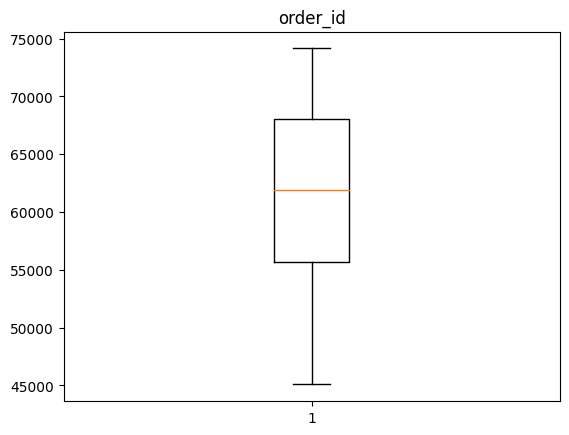

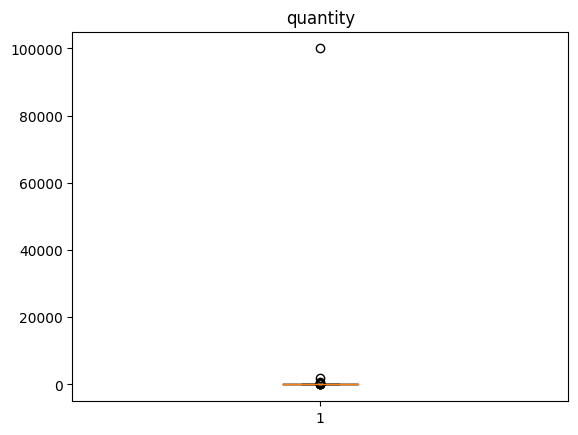

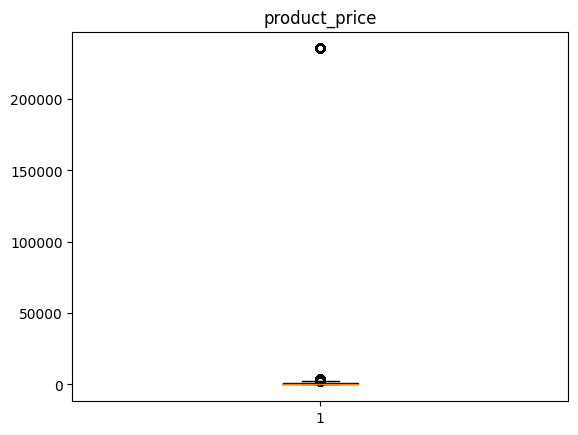

In [20]:
# Search for and filter outliers
import matplotlib.pyplot as plt

for column in ss.columns:
  if ss[column].dtype in ['int64', 'float64']:
    plt.boxplot(ss[column])
    plt.title(column)
    plt.show()

NameError: name 'df' is not defined

In [38]:
def filter_by_thresholds(df, quantity_threshold=10, price_threshold=1000):
    """
    Filters a DataFrame to remove rows where quantity exceeds a given threshold
    or product_price exceeds another threshold.

    Args:
        df: The input DataFrame.
        quantity_threshold: The maximum allowed quantity.
        price_threshold: The maximum allowed product_price.

    Returns:
        A new DataFrame with filtered rows.
    """
    # Check if the required columns exist in the DataFrame
    if 'quantity' not in df.columns:
        raise ValueError("Column 'quantity' not found in DataFrame.")
    if 'product_price' not in df.columns:
        raise ValueError("Column 'product_price' not found in DataFrame.")

    filtered_df = df[(df['quantity'] <= quantity_threshold) &
                      (df['product_price'] <= price_threshold)]
    return filtered_df

# Example usage:
ss_filtered = filter_by_thresholds(ss, quantity_threshold=10, price_threshold=1000)
print(ss_filtered.head())

   order_id order_date order_year_month  customer_name               city  \
0     51188 2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187 2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199 2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241 2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297 2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
3  Apple

In [56]:
print(ss_filtered['quantity'].unique())

[3. 4. 5. 1. 2.]


In [57]:
# ss.columns
ss_filtered.columns
ss_filtered['total_purchase'] = ss_filtered['product_price'] * ss_filtered['quantity']


<ipython-input-57-665dc43adcf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['total_purchase'] = ss_filtered['product_price'] * ss_filtered['quantity']


Check that your cleaning worked

In [58]:
# your code goes here
# Check if 'total_purchase' column exists and display the head
print('total_purchase' in ss_filtered.columns)
print(ss_filtered.head())

True
   order_id order_date order_year_month  customer_name               city  \
0     51188 2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187 2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199 2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241 2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297 2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
3  

In [59]:
ss_filtered.describe(include='all')

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_purchase,z_score,year,month,price_zscore,quantity_zscore
count,43966.000000,43920,43966,43966,43966,43966,43966.000000,43966,43966,43966.000000,43966.000000,43966.000000,43920.000000,43920.000000,43966.000000,43966.000000
unique,NaN,NaN,35,16299,11449,54,NaN,79,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2022-05,Fernando Barnes,Salt Lake City,ARIZONA,NaN,Water Bottle - 30 oz.,Accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4428,61,156,1075,NaN,3935,19715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,62517.056521,2021-12-09 17:17:16.721311488,NaN,NaN,NaN,NaN,1.603762,NaN,NaN,274.936835,362.868016,-0.165864,2021.455191,6.351252,-0.165864,-0.004149
min,45080.000000,1922-06-28 00:00:00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.290000,2.290000,-0.173464,1922.000000,1.000000,-0.173464,-0.005571
25%,56666.000000,2021-10-25 00:00:00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,4.990000,9.980000,-0.173389,2021.000000,3.000000,-0.173389,-0.005571
50%,62508.500000,2022-01-21 00:00:00,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,48.070000,48.070000,-0.172188,2022.000000,6.000000,-0.172188,-0.003215
75%,68341.000000,2022-04-15 00:00:00,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,609.630000,609.630000,-0.156535,2022.000000,10.000000,-0.156535,-0.003215
max,74147.000000,2029-08-02 00:00:00,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,926.710000,3249.950000,-0.147697,2029.000000,12.000000,-0.147697,0.003851


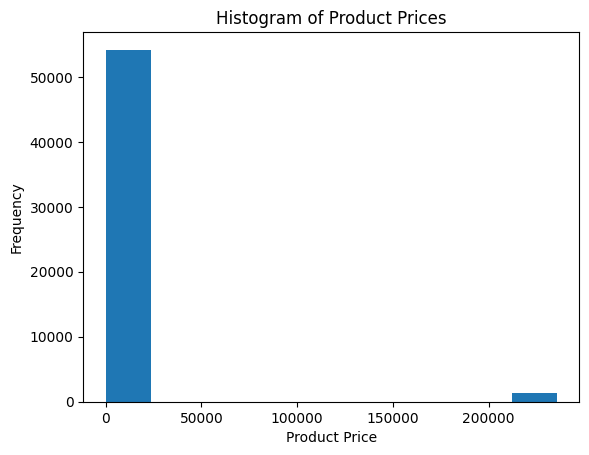

In [42]:
import matplotlib.pyplot as plt

plt.hist(ss['product_price'])
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Histogram of Product Prices')
plt.show()

In [61]:
ss_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43966 entries, 0 to 56044
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          43966 non-null  int64         
 1   order_date        43920 non-null  datetime64[ns]
 2   order_year_month  43966 non-null  object        
 3   customer_name     43966 non-null  object        
 4   city              43966 non-null  object        
 5   state_province    43966 non-null  object        
 6   quantity          43966 non-null  float64       
 7   product_name      43966 non-null  object        
 8   product_line      43966 non-null  object        
 9   product_price     43966 non-null  float64       
 10  total_purchase    43966 non-null  float64       
 11  z_score           43966 non-null  float64       
 12  year              43920 non-null  float64       
 13  month             43920 non-null  float64       
 14  price_zscore      43966 non

# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [65]:
# average price

ss_filtered['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce')
ss_filtered['year'] = ss_filtered['order_date'].dt.year
ss_filtered['month'] = ss_filtered['order_date'].dt.month

average_price_per_month = ss_filtered.groupby(['year', 'month'])['product_price'].mean()
print(average_price_per_month)

year    month
1922.0  6.0      290.462128
2020.0  1.0      630.090000
        2.0      630.090000
        3.0      630.090000
        4.0      630.090000
        5.0      630.090000
        6.0      630.090000
        7.0      630.090000
        8.0      630.090000
        9.0      630.090000
        10.0     630.090000
        11.0     630.090000
        12.0     630.090000
2021.0  1.0      630.090000
        2.0      630.090000
        3.0      630.090000
        4.0      630.090000
        5.0      630.090000
        6.0      630.090000
        7.0      292.586824
        8.0      262.103689
        9.0      260.358474
        10.0     255.262519
        11.0     272.995200
        12.0     277.175381
2022.0  1.0      267.374479
        2.0      259.978323
        3.0      270.613324
        4.0      265.983582
        5.0      284.589149
        6.0      270.780292
2029.0  6.0        3.640000
        7.0      228.688451
        8.0        6.656667
Name: product_price, dtype: float6

<ipython-input-65-9d302243d331>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['order_date'] = pd.to_datetime(ss['order_date'], errors='coerce')
<ipython-input-65-9d302243d331>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['year'] = ss_filtered['order_date'].dt.year
<ipython-input-65-9d302243d331>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [67]:
# Attempt to convert 'order_date' to datetime, handling errors
ss_filtered['order_date'] = pd.to_datetime(ss_filtered['order_date'], errors='coerce')

# Drop rows with missing values (including NaT in 'order_date')
ss_filtered = ss_filtered.dropna()

# Filter out rows with year 2029 and 1922
df_filtered = ss_filtered[(ss_filtered['order_date'].dt.year != 2029) & (ss_filtered['order_date'].dt.year != 1922)]

print("DataFrame after removing rows with year 2029, 1922 and invalid dates:")
print(df_filtered)

DataFrame after removing rows with year 2029, 1922 and invalid dates:
       order_id order_date order_year_month     customer_name  \
0         51188 2021-07-01          2021-07     Audrey Blanco   
1         51187 2021-07-01          2021-07       Isaac Allen   
2         51199 2021-07-02          2021-07        Ian Morgan   
3         51241 2021-07-04          2021-07        Alexa Bell   
4         51297 2021-07-08          2021-07        Casey Diaz   
...         ...        ...              ...               ...   
56040     74084 2022-06-29          2022-06        Ian Rogers   
56041     74062 2022-06-29          2022-06   Marcus Anderson   
56042     74065 2022-06-29          2022-06  Nathaniel Howard   
56043     74038 2022-06-29          2022-06        Robin Sanz   
56044     74110 2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Trace

In [72]:
# total revenue
# Calculate total revenue
df_filtered['total_purchase'] = df_filtered['product_price'] * df_filtered['quantity']
total_revenue = df_filtered['total_purchase'].sum()

print("Total revenue:", total_revenue)

Total revenue: 15896911.17


<ipython-input-72-41f6224b2d9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_purchase'] = df_filtered['product_price'] * df_filtered['quantity']


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

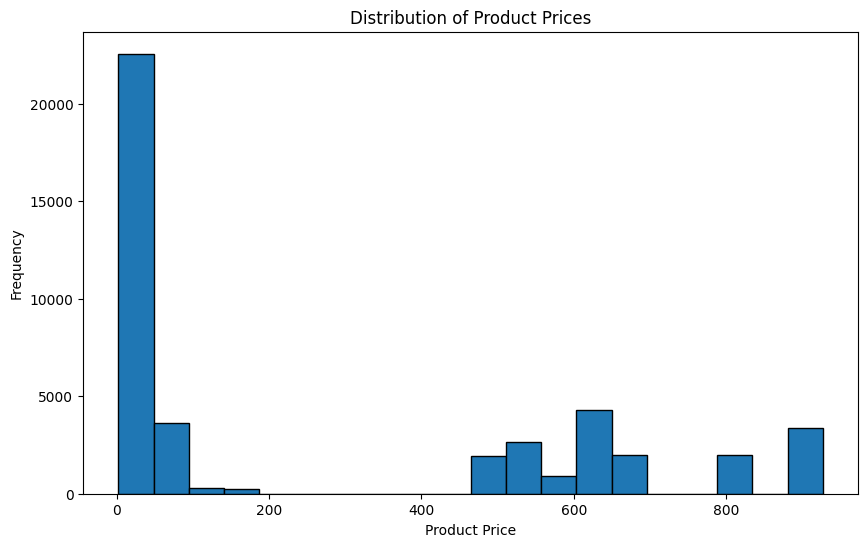

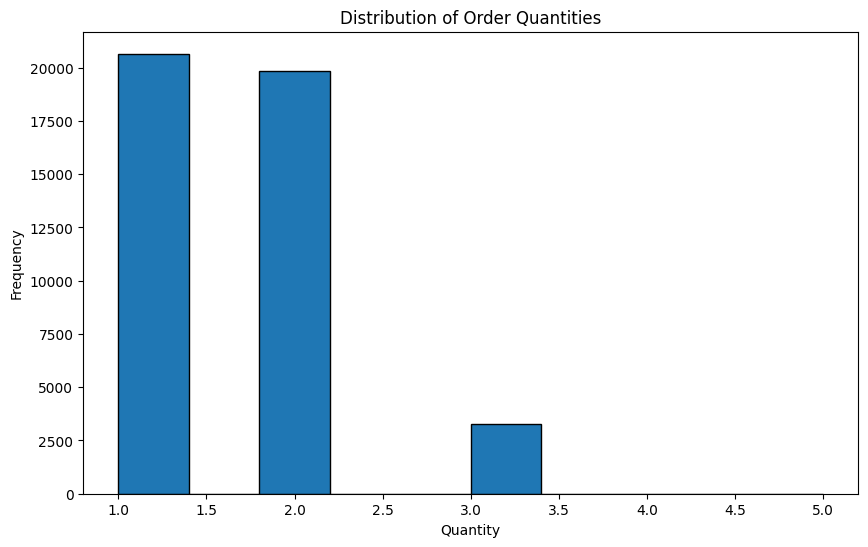

In [74]:
# Your code goes here.  Plot 1

import matplotlib.pyplot as plt

# Histogram for product price
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['product_price'], bins=20, edgecolor='black')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()

# Histogram for quantity
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['quantity'], bins=10, edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.show()

<ipython-input-75-9f2ffec4b999>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])


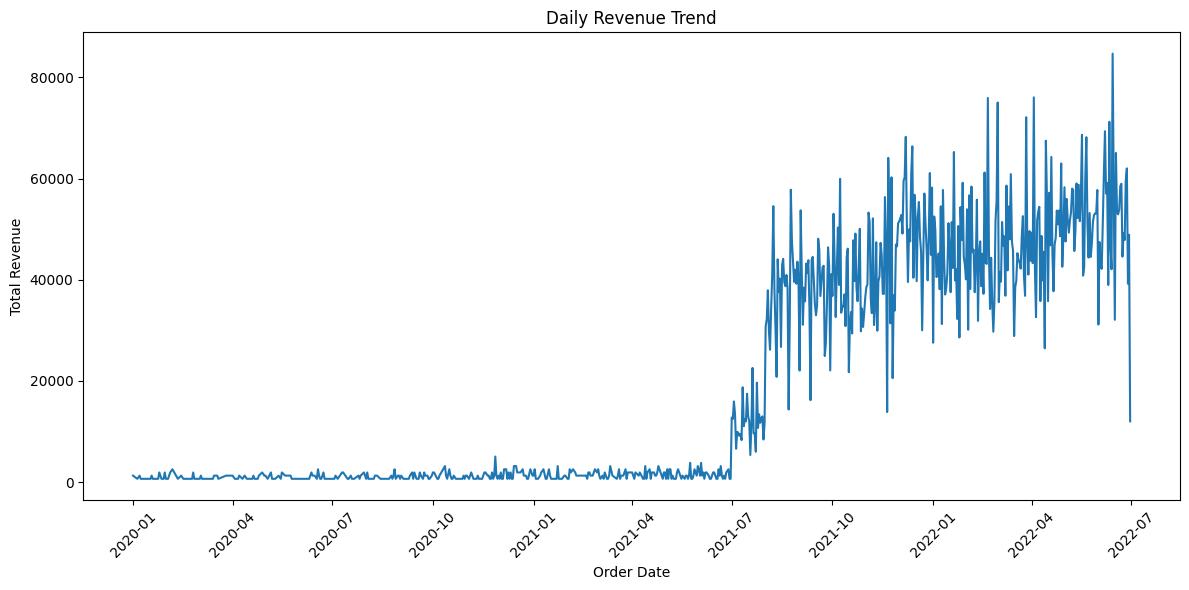

In [75]:
# Your code goes here.  Plot 2

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'order_date' is a string, convert it to datetime
df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])

# Group by order date and calculate total revenue for each date
daily_revenue = df_filtered.groupby('order_date')['total_purchase'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.title('Daily Revenue Trend')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The revenue is increasing as the purchase dates continue on. The company is gaining in total revenue. There are higher purchase rates at a lower price point for the company.